## Customer Segmentation Analysis for Supermarket Chain

Customer segmentation is the process of dividing customers into groups based on shared characteristics to implement more effective and targeted marketing strategies. This approach can be utilized by businesses across various industries and sales channels, whether online or in physical stores. For instance, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.

The goal of this project is to identify distinct customer segments using data collected through customer loyalty cards. By analyzing customer demographics and purchasing behavior, the project aims to provide actionable insights that can assist the supermarket chain refine its marketing strategies to more effectively target various customer groups.

**Dataset Description**

| Variable Name | Data Type | Description |
|---------------|-----------|-------------|
| Gender        | Categorical | Indicates the customer's biological sex: 0 for male, 1 for female. |
| Marital Status | Categorical | Shows whether the customer is single 0 or in a relationship (married/divorced/separated/widowed) 1. |
| Age           | Numerical | The customer's age in years, ranging from 18 to 76. |
| Education     | Categorical | Education level of the customer: 0 for other/unknown, 1 for high school, 2 for university, 3 for graduate school. |
| Income        | Numerical | The customer's annual income in US dollars, varying from 35,832 to 309,364. |
| Occupation    | Categorical | Occupation type: 0 for unemployed/unskilled, 1 for skilled employee/official, 2 for management/self-employed/highly qualified employee/officer. |
| Settlement Size | Categorical | Size of the city where the customer resides: 0 for small, 1 for mid-sized, 2 for large city. |


The dataset consists of seven variables. These variables are both categorical (Gender, Marital Status, Education, Occupation, Settlement Size) and numerical (Age, Income). They provide detailed insights into each customer's biological sex, marital status, age, educational background, annual income, occupation, and the size of the city they live in.

### Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
import pandas as pd

# Load Dataset
data = pd.read_csv('customer_loyalty_cards_dataset.csv')

# Display the first few rows of the dataset
print(data.head())

   Gender  Marital Status  Education  Settlement Size  Occupation  Income  Age
0       0               0          3                2           2  185611   50
1       0               1          1                0           1  114778   30
2       0               1          1                0           0  132788   34
3       0               1          3                2           2  209671   55
4       1               1          1                2           1  118593   44


In [3]:
# Describe the dataset
print(data.describe())

            Gender  Marital Status    Education  Settlement Size   Occupation  \
count  4000.000000     4000.000000  4000.000000      4000.000000  4000.000000   
mean      0.489500        0.510500     1.708250         1.090000     1.200750   
std       0.499952        0.499952     1.024155         0.869246     0.526326   
min       0.000000        0.000000     0.000000         0.000000     0.000000   
25%       0.000000        0.000000     1.000000         0.000000     1.000000   
50%       0.000000        1.000000     1.000000         1.000000     1.000000   
75%       1.000000        1.000000     3.000000         2.000000     2.000000   
max       1.000000        1.000000     3.000000         2.000000     2.000000   

              Income          Age  
count    4000.000000  4000.000000  
mean   134353.792250    39.946250  
std     48533.567076    10.269724  
min     35832.000000    18.000000  
25%     97815.250000    32.000000  
50%    122607.000000    38.000000  
75%    165920.2500

In [4]:
# Describe the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           4000 non-null   int64
 1   Marital Status   4000 non-null   int64
 2   Education        4000 non-null   int64
 3   Settlement Size  4000 non-null   int64
 4   Occupation       4000 non-null   int64
 5   Income           4000 non-null   int64
 6   Age              4000 non-null   int64
dtypes: int64(7)
memory usage: 218.9 KB


In [5]:
# Check for missing values
print("Number of missing values in each column:\n", data.isnull().sum())

Number of missing values in each column:
 Gender             0
Marital Status     0
Education          0
Settlement Size    0
Occupation         0
Income             0
Age                0
dtype: int64


### Exploratory Data Analysis

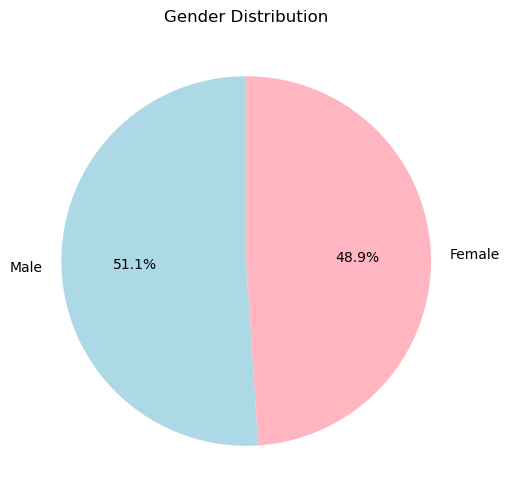

Gender Distribution in the Dataset:
0    2042
1    1958
Name: Gender, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visualization of Gender distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution')
plt.ylabel('')  # Remove the y-label as it is not necessary for pie charts
plt.show()

# Print basic statistics for Gender
print("Gender Distribution in the Dataset:")
print(gender_counts)

From the pie chart, it is evident that the dataset is nearly balanced with a slight male majority (51.1% male vs. 48.9% female)

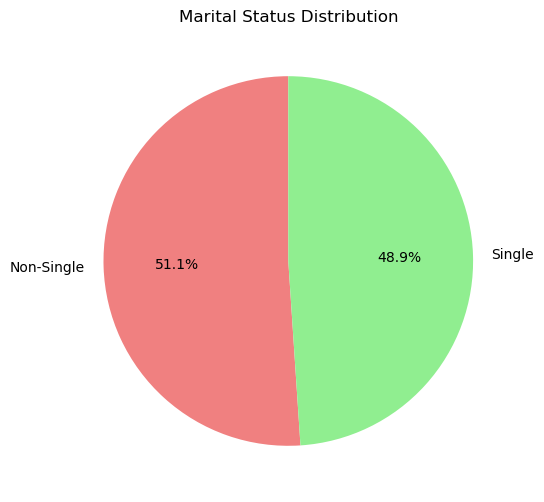

Marital Status Distribution in the Dataset:
1    2042
0    1958
Name: Marital Status, dtype: int64


In [7]:
# Visualization of Marital Status distribution
marital_counts = data['Marital Status'].value_counts()
plt.figure(figsize=(8, 6))
marital_counts.plot(kind='pie', labels=['Non-Single', 'Single'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Marital Status Distribution')
plt.ylabel('')  # Remove the y-label as it is not necessary for pie charts
plt.show()

# Print basic statistics for Marital Status
print("Marital Status Distribution in the Dataset:")
print(marital_counts)

The pie chart clearly shows that the dataset contains a nearly even split between "Single" and "Non-Single" individuals, with "Non-Single" slightly more prevalent at 51.1% compared to 48.9% for "Single".

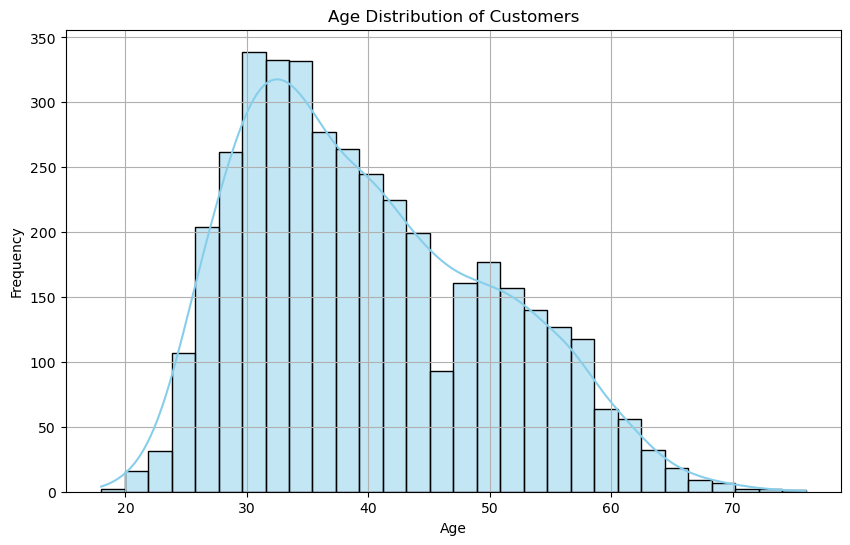

Age Statistics:
count    4000.000000
mean       39.946250
std        10.269724
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        76.000000
Name: Age, dtype: float64


In [8]:
# Visualization of Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)  # Adds a grid for better readability
plt.show()

# Print basic statistics for Age
age_description = data['Age'].describe()
print("Age Statistics:")
print(age_description)

The histogram shows the shape of the distribution, which appears approximately normal with a slight skew towards older ages, peaking around the late 30s. The descriptive statistics complement the visual data by detailing the central tendency and dispersion, with a mean age of approximately 39.95 years and a standard deviation of 10.27, highlighting the breadth of customer ages from 18 to 76 years.

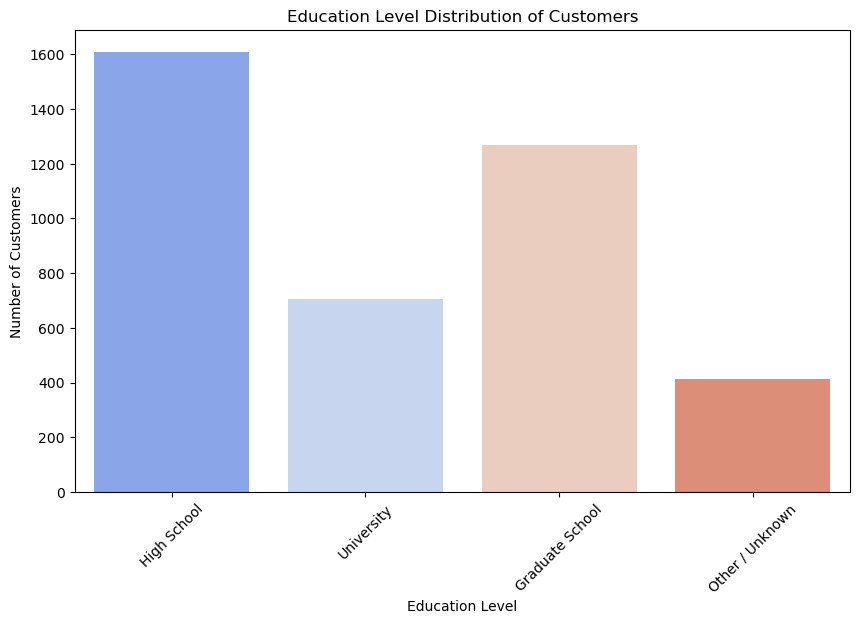

Education Level Distribution in the Dataset:
High School        1609
University          707
Graduate School    1270
Other / Unknown     414
Name: Education, dtype: int64


In [9]:
# Map numerical categories to meaningful labels
education_mapping = {0: 'Other / Unknown', 1: 'High School', 2: 'University', 3: 'Graduate School'}
data['Education'] = data['Education'].map(education_mapping)

# Count the number of instances for each education category
education_counts = data['Education'].value_counts().reindex(['High School', 'University', 'Graduate School', 'Other / Unknown'])

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='coolwarm')
plt.title('Education Level Distribution of Customers')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# Print counts to help identify data distribution
print("Education Level Distribution in the Dataset:")
print(education_counts)

The bar chart displays the educational levels of customers, showing that 'High School' is the most common, followed by 'Graduate School', 'University', and 'Other / Unknown'. With 'High School' leading at 1609 customers and 'Graduate School' at 1270, the data indicates a predominantly educated customer base. 

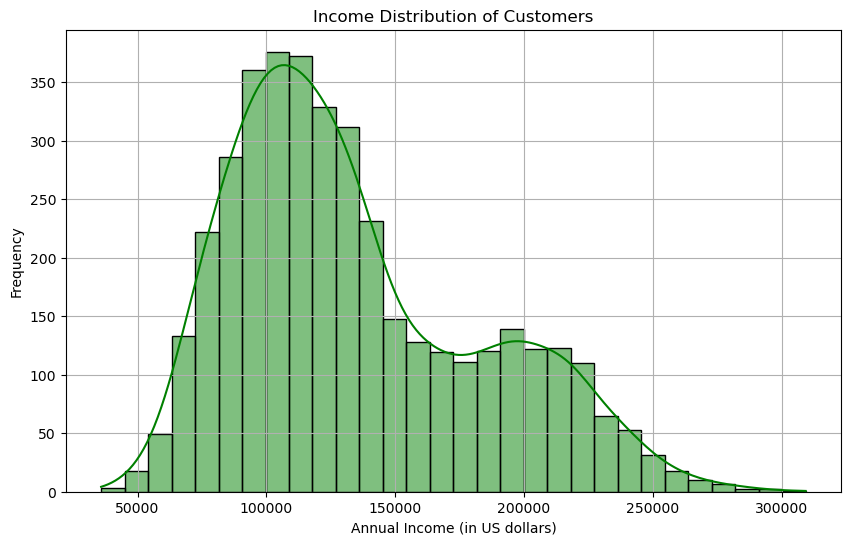

Income Statistics:
count      4000.000000
mean     134353.792250
std       48533.567076
min       35832.000000
25%       97815.250000
50%      122607.000000
75%      165920.250000
max      309364.000000
Name: Income, dtype: float64


In [10]:
# Visualization of Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=30, kde=True, color='green')
plt.title('Income Distribution of Customers')
plt.xlabel('Annual Income (in US dollars)')
plt.ylabel('Frequency')
plt.grid(True)  # Adds a grid for better readability
plt.show()

# Print basic statistics for Income
income_description = data['Income'].describe()
print("Income Statistics:")
print(income_description)

The graph of customer incomes, showing a right-skewed pattern with most customers earning below the median of 122,607. The peak frequency occurs just above 100,000, reflecting a concentration of incomes in this range. The graph highlights a broad income range from about 35,832 to 309,364, indicating significant economic diversity among customers.

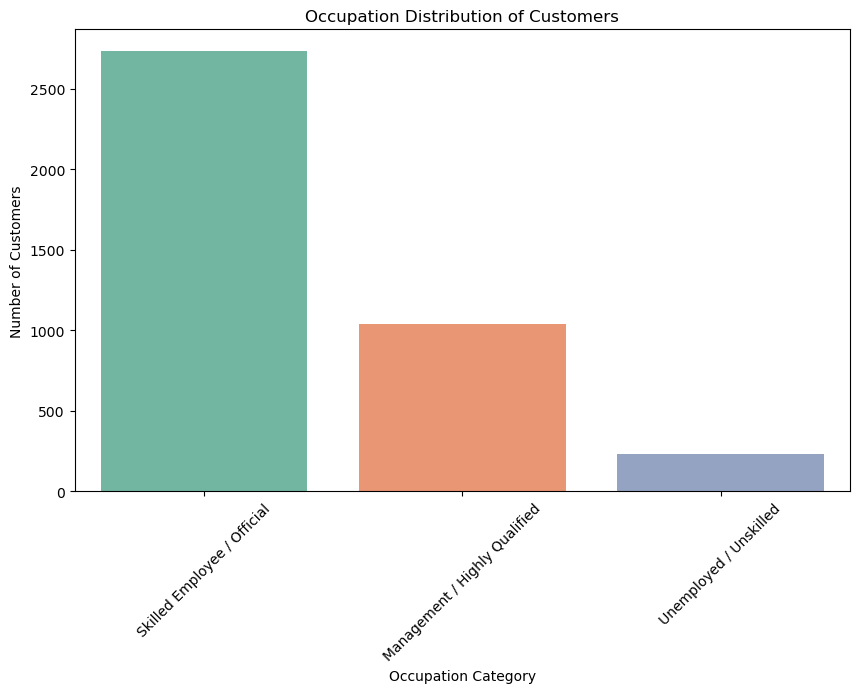

Occupation Distribution in the Dataset:
Skilled Employee / Official      2731
Management / Highly Qualified    1036
Unemployed / Unskilled            233
Name: Occupation, dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Map numerical categories to meaningful labels
occupation_mapping = {0: 'Unemployed / Unskilled', 1: 'Skilled Employee / Official', 2: 'Management / Highly Qualified'}
data['Occupation'] = data['Occupation'].map(occupation_mapping)

# Count the number of instances for each occupation category
occupation_counts = data['Occupation'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='Set2')
plt.title('Occupation Distribution of Customers')
plt.xlabel('Occupation Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# Print counts to help identify data distribution
print("Occupation Distribution in the Dataset:")
print(occupation_counts)

The bar chart illustrates the occupation distribution among customers, categorized into three groups: Skilled Employees/Officials (2,731), Management/Highly Qualified (1,036), and Unemployed/Unskilled (233). The graph representing Skilled Employees/Officials is the tallest.

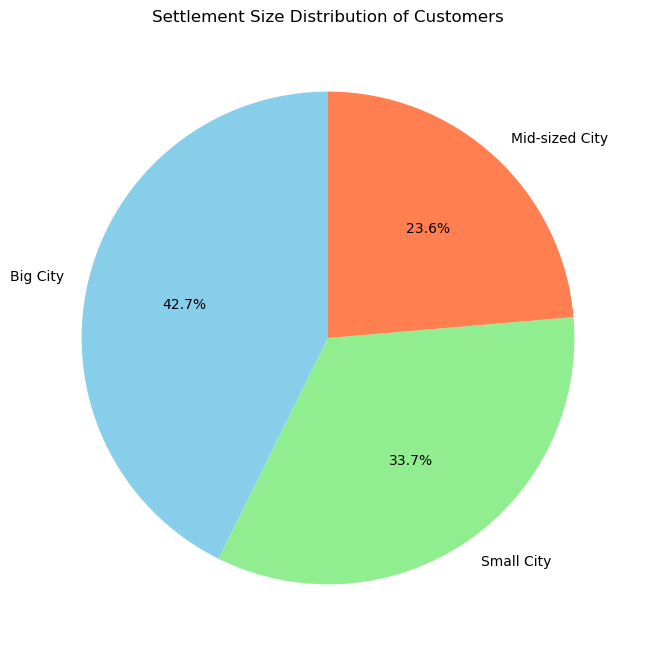

Settlement Size Distribution in the Dataset:
Big City          1707
Small City        1347
Mid-sized City     946
Name: Settlement Size, dtype: int64


In [12]:
# Map numerical categories to meaningful labels
settlement_mapping = {0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'}
data['Settlement Size'] = data['Settlement Size'].map(settlement_mapping)

# Count the number of instances for each settlement size
settlement_counts = data['Settlement Size'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(settlement_counts, labels=settlement_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral'])
plt.title('Settlement Size Distribution of Customers')
plt.show()

# Print counts to help identify data distribution
print("Settlement Size Distribution in the Dataset:")
print(settlement_counts)

The pie chart displays the settlement size distribution of customers: 42.7% in big cities, 33.7% in small cities, and 23.6% in mid-sized cities. The majority residing in big cities.

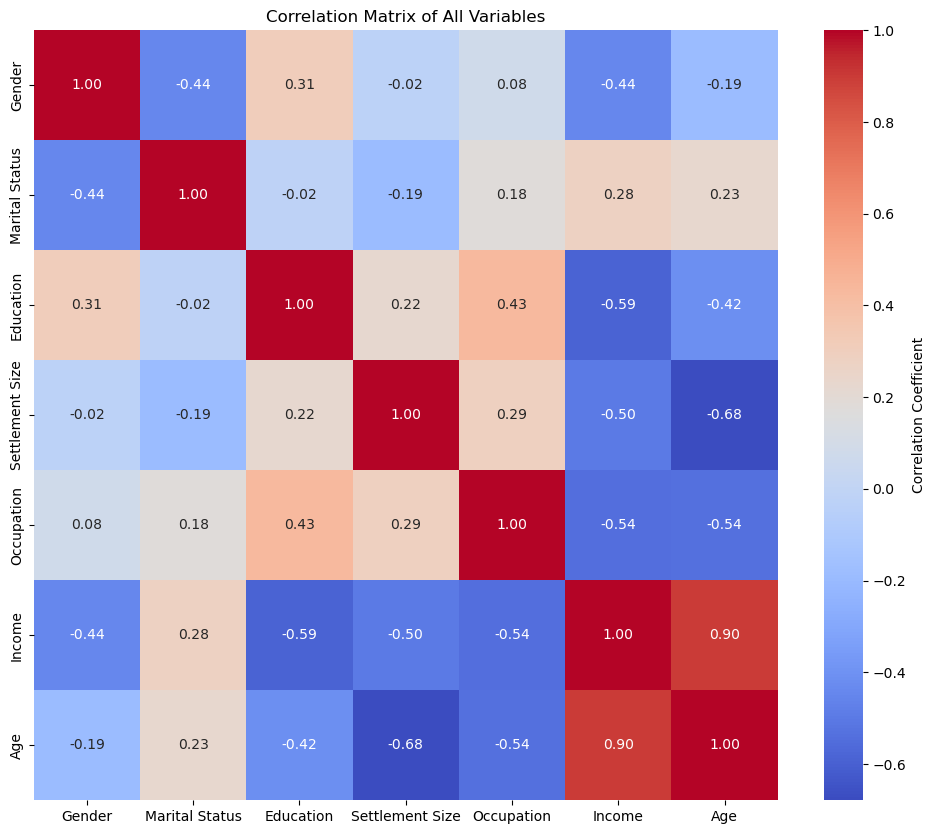

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Mapping and encoding categorical data
categorical_vars = ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']
data[categorical_vars] = data[categorical_vars].apply(lambda x: pd.factorize(x)[0])


# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of All Variables')
plt.show()

##### Correlation Matrix Description:

Positive Correlations:

* Income and Age: A high positive correlation of 0.90, indicating that customer age tends to increase with income. This suggests that older customers might have higher earning power, which could be due to longer career progression.

* Education and Occupation: Marked by a correlation coefficient of 0.43, suggesting that higher educational levels are associated with more advanced or specialized occupations.

* Settlement Size and Occupation: With a correlation of 0.29, indicating that customers in larger settlements tend to hold jobs that are more advanced, possibly reflecting better job opportunities in bigger cities.


Negative Correlations:

* Age and Settlement Size: Shows a strong negative correlation of -0.68, implying that younger customers are more likely to live in larger cities, which may be due to urban migration trends among the youth seeking employment or education opportunities.

* Income and Education: This correlation is -0.59, which might initially seem counterintuitive but could indicate sectors or roles where high income is achievable without higher academic qualifications, such as entrepreneurial ventures or specialized trades.

* Gender and Marital Status: A negative correlation of -0.44, suggesting a possible trend where one gender might be more likely to be single than the other in this dataset.


Weak or No Correlation:

* Gender and Settlement Size: A very weak correlation of -0.02, indicating no significant relationship between the gender of the customers and the size of the city they reside in.

* Marital Status and Settlement Size: Also shows a weak correlation of -0.19, suggesting that marital status does not significantly vary with city size.

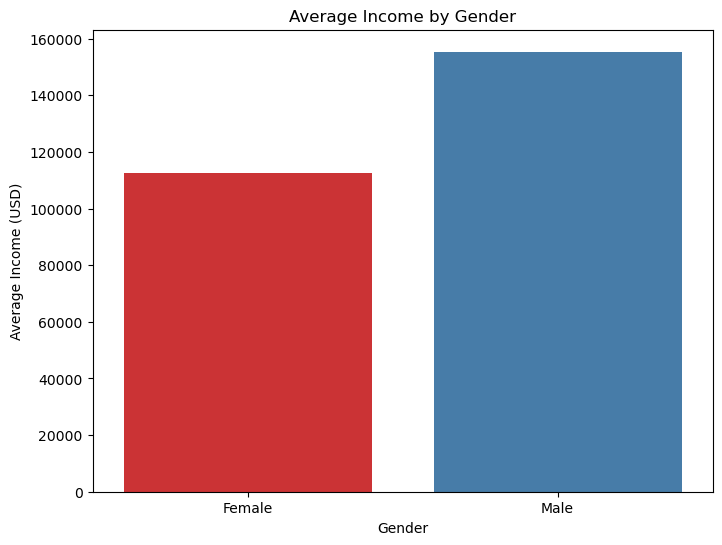

In [14]:
# Mapping gender for better readability
gender_map = {0: 'Male', 1: 'Female'}
data['Gender'] = data['Gender'].map(gender_map)

# Calculating average income by gender
gender_income_average = data.groupby('Gender')['Income'].mean()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_income_average.index, y=gender_income_average.values, palette='Set1')
plt.title('Average Income by Gender')
plt.ylabel('Average Income (USD)')
plt.show()

The bar chart shows average income by gender. The blue bar represents males and the red bar represents females, highlighting a significant income disparity between genders with males earning around 145,000 and females slightly above 100,000.

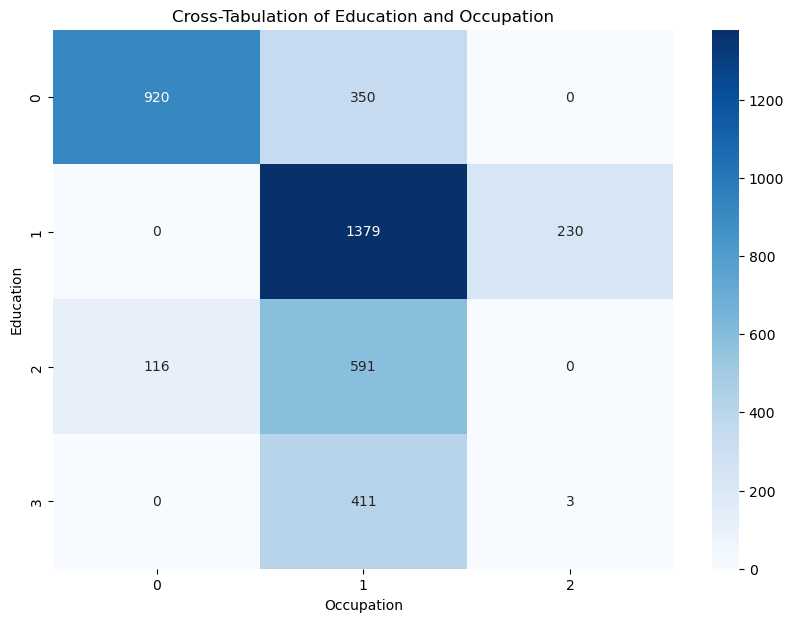

In [15]:
# Cross-tabulation
education_occupation = pd.crosstab(data['Education'], data['Occupation'])

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(education_occupation, annot=True, cmap='Blues', fmt="d")
plt.title('Cross-Tabulation of Education and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Education')
plt.show()

The heatmap shows the distribution of customers across education levels and occupation categories.

* High School & Skilled Employees: Largest group with 1,379 customers.

* Other/Unknown & Unemployed: Significant group with 920 customers.

* University & Skilled Employees: 591 customers.

* Graduate School: Fewest, mainly in skilled positions (411 customers).

This chart highlights that most customers are skilled employees with high school education.

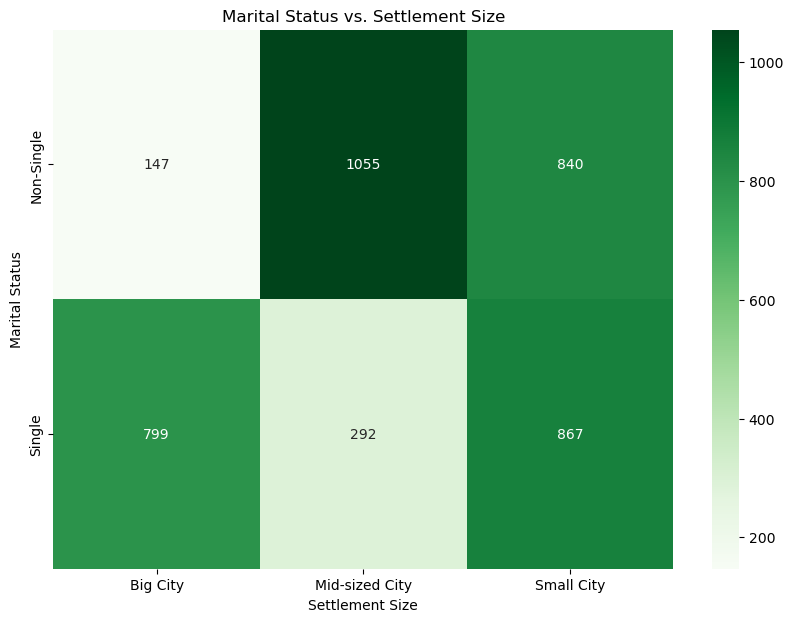

In [16]:
# Mapping for readability
marital_status_map = {0: 'Single', 1: 'Non-Single'}
settlement_size_map = {0: 'Small City', 1: 'Mid-sized City', 2: 'Big City'}
data['Marital Status'] = data['Marital Status'].map(marital_status_map)
data['Settlement Size'] = data['Settlement Size'].map(settlement_size_map)

# Cross-tabulation
marital_settlement = pd.crosstab(data['Marital Status'], data['Settlement Size'])

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(marital_settlement, annot=True, fmt="d", cmap="Greens")
plt.title('Marital Status vs. Settlement Size')
plt.xlabel('Settlement Size')
plt.ylabel('Marital Status')
plt.show()

The heatmap shows the distribution of customers by marital status and settlement size:

* Non-Single in Mid-sized Cities: Highest count (1,055).

* Single in Small Cities: Significant count (867).

* Single in Big Cities: Notable count (799).

* Non-Single in Big Cities: Lowest count (147).

This visualization highlights that non-singles are concentrated in mid-sized cities, while singles are more evenly distributed across big and small cities.

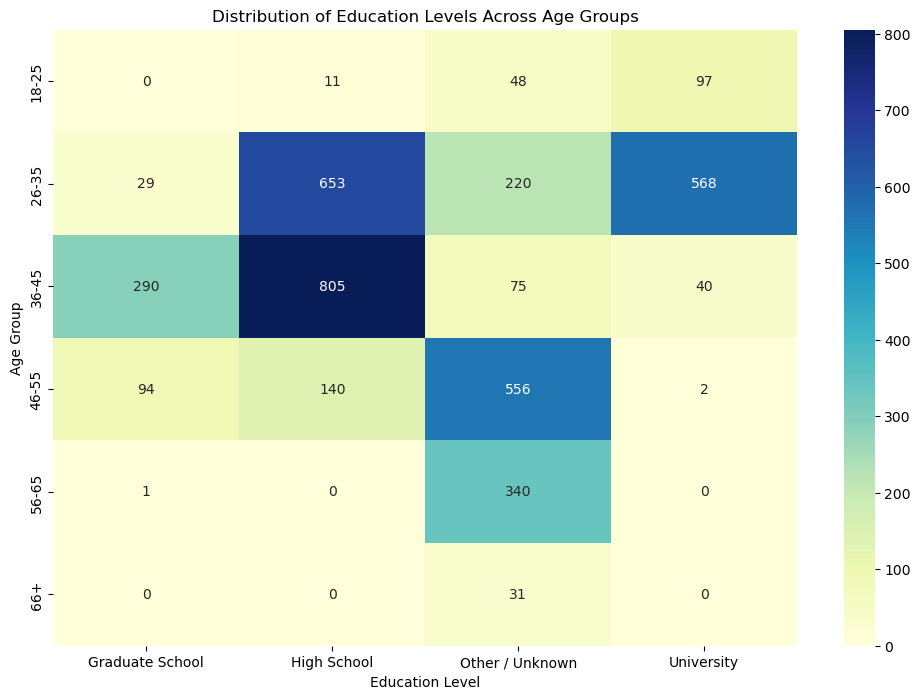

In [17]:
# Categorize age into groups
data['Age Group'] = pd.cut(data['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# Mapping for readability
education_map = {0: 'Other / Unknown', 1: 'High School', 2: 'University', 3: 'Graduate School'}
data['Education'] = data['Education'].map(education_map)

# Cross-tabulation
age_education = pd.crosstab(data['Age Group'], data['Education'])

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(age_education, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribution of Education Levels Across Age Groups')
plt.xlabel('Education Level')
plt.ylabel('Age Group')
plt.show()

The heatmap shows the distribution of education levels across age groups.

Key Observations:

* High School & Age 36-45: Highest count (805).

* University & Age 26-35: Large count (568).

* Graduate School & Age 36-45: Notable count (290).

* Other / Unknown & Age 56-65: Significant count (340).

* Younger customers (26-35) often have university degrees, while older customers (36-45) frequently have high school education.

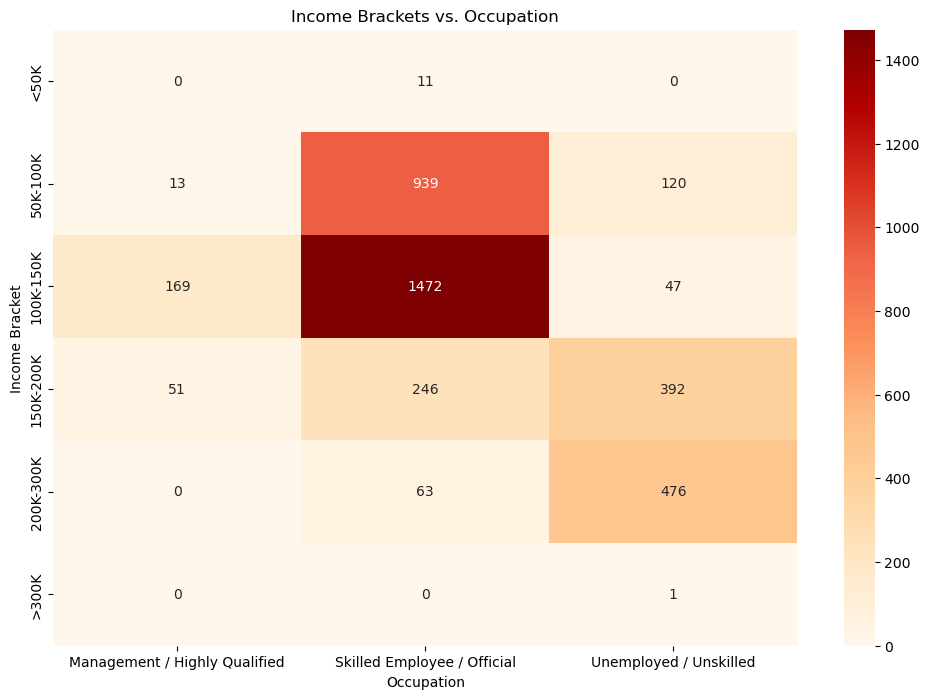

In [18]:
# Categorize income into brackets
data['Income Bracket'] = pd.cut(data['Income'], bins=[0, 50000, 100000, 150000, 200000, 300000, 400000], labels=['<50K', '50K-100K', '100K-150K', '150K-200K', '200K-300K', '>300K'])

# Mapping for readability
occupation_map = {0: 'Unemployed / Unskilled', 1: 'Skilled Employee / Official', 2: 'Management / Highly Qualified'}
data['Occupation'] = data['Occupation'].map(occupation_map)

# Cross-tabulation
income_occupation = pd.crosstab(data['Income Bracket'], data['Occupation'])

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(income_occupation, annot=True, fmt="d", cmap="OrRd")
plt.title('Income Brackets vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Income Bracket')
plt.show()

This heatmap highlights income distribution across occupations.

Key Observations:

* Skilled Employees / Officials & 100K-150K: The highest count (1,472), indicating that many customers in this occupation earn between 100K-150K.

* Management / Highly Qualified & 100K-150K: Significant count (169), showing a substantial number of customers in management roles earn within this range.

* Unemployed / Unskilled & 200K-300K: Surprisingly high count (476), suggesting that some high-income individuals are categorized as unemployed or unskilled, possibly due to other income sources or financial support.

* Low Counts: Few or no customers in the <50K income bracket for Management / Highly Qualified and >300K bracket for all occupations.

* The majority of skilled employees and officials earn between 100K-150K, indicating a strong middle-income group within this category.

### Customer Segmentation 

In [19]:
# Attempt to load the dataset
try:
    data = pd.read_csv('customer_loyalty_cards_dataset.csv')
    print("Dataset loaded successfully!")
    print(data.head())  # Display the first few rows of the dataset
except Exception as e:
    print("Error loading the dataset:", e)

Dataset loaded successfully!
   Gender  Marital Status  Education  Settlement Size  Occupation  Income  Age
0       0               0          3                2           2  185611   50
1       0               1          1                0           1  114778   30
2       0               1          1                0           0  132788   34
3       0               1          3                2           2  209671   55
4       1               1          1                2           1  118593   44


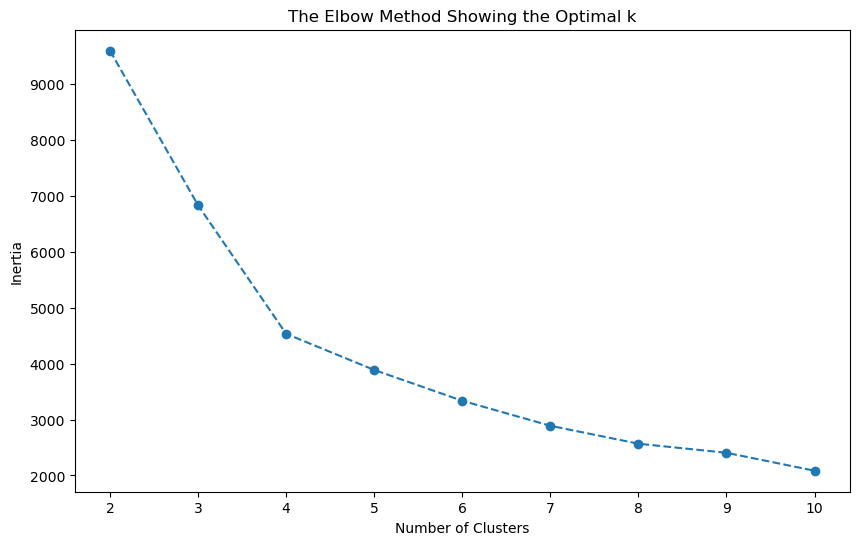

In [20]:
# Standardize the numeric variables 'Income' and 'Age'
scaler = StandardScaler()
data[['Income', 'Age']] = scaler.fit_transform(data[['Income', 'Age']])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

Key Observations:

* Inertia Trend: As the number of clusters increases, the inertia decreases. This is expected because adding more clusters reduces the within-cluster variance.

* Elbow Point: The plot shows a sharp bend at k=4, indicating the "elbow." Beyond this point, the rate of decrease in inertia slows down.

* Optimal k: The elbow point at k=4 suggests that four clusters might be the optimal number for this dataset. It balances the trade-off between minimizing inertia and avoiding overfitting with too many clusters.

* Cluster Selection: The Elbow Method helps determine the number of clusters that best represents the data structure without excessive complexity. Here, k=4 is recommended as the optimal number of clusters. This is crucial for effective customer segmentation and subsequent analysis.

In [21]:
# Define the range of k values to test
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over the k values
for k in k_values:
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    
    # Calculate the silhouette score and append it to the list
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Print the silhouette score for this number of clusters
    print(f"Average silhouette coefficient for k={k}: {silhouette_avg}")

Average silhouette coefficient for k=2: 0.4843885099849873
Average silhouette coefficient for k=3: 0.41574728657167326
Average silhouette coefficient for k=4: 0.5049697576471209
Average silhouette coefficient for k=5: 0.4766785514296404
Average silhouette coefficient for k=6: 0.4757726983902343
Average silhouette coefficient for k=7: 0.4703689256900986
Average silhouette coefficient for k=8: 0.49076354217256357
Average silhouette coefficient for k=9: 0.45936258505871214
Average silhouette coefficient for k=10: 0.48039738244256025


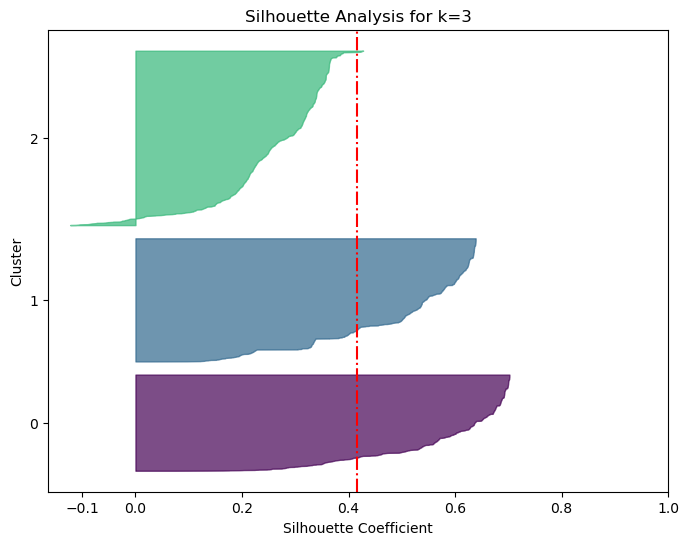

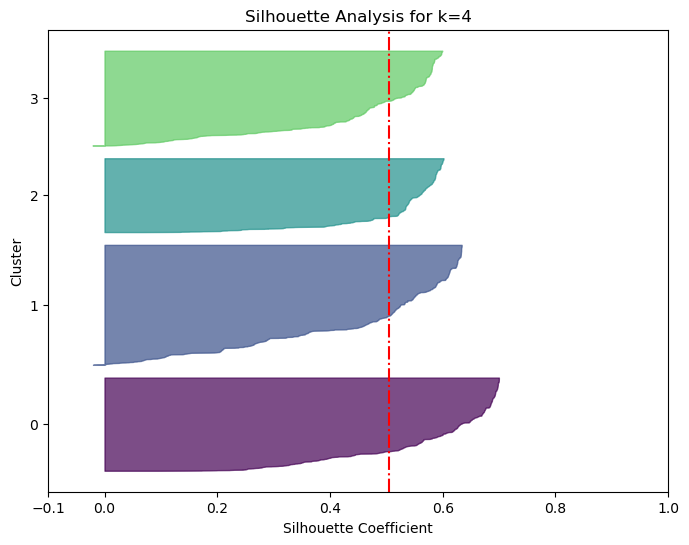

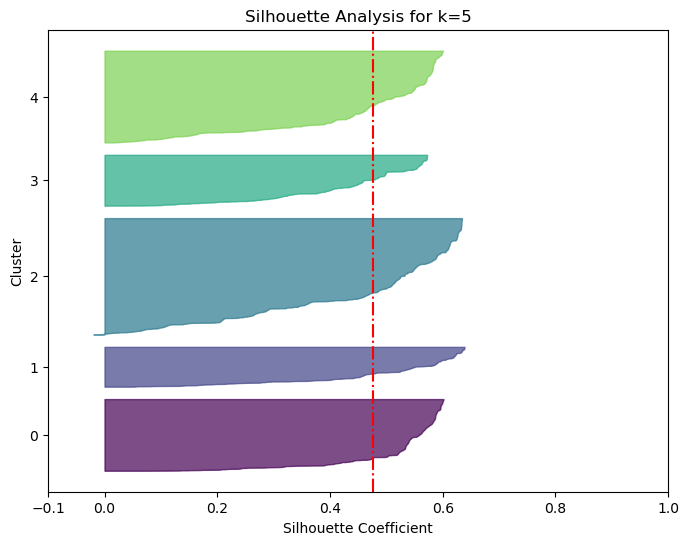

In [22]:
# Iterate through the specified number of clusters
for k in (3, 4, 5):
    plt.figure(figsize=(8, 6))

    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    y_pred = kmeans.labels_
    silhouette_coeffs = silhouette_samples(data, y_pred)

    padding = len(data) // 30
    pos = padding
    ticks = []

    # Create silhouette plots
    for i in range(k):
        coeffs = silhouette_coeffs[y_pred == i]  # Cluster coefficients
        coeffs.sort()

        # Change color map to 'viridis'
        color = plt.cm.viridis(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)

        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Adjust y-axis to show cluster labels
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    # Label axes based on cluster number
    plt.ylabel("Cluster")
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")

    # Draw average silhouette score line
    silhouette_avg = np.mean(silhouette_coeffs)
    plt.axvline(x=silhouette_avg, color='red', linestyle='-.')  # Changed linestyle to '-.'

    # Title to reflect the number of clusters
    plt.title(f"Silhouette Analysis for k={k}")

    # Show the plot for this particular number of clusters
    plt.show()

The silhouette analysis graphs for k=3, k=4, and k=5 display the quality of clustering. Each plot shows silhouette coefficients for individual clusters:

* k=3: Average silhouette score around 0.4. Three clusters with varying definitions; cluster 2 is well-defined.

* k=4: Slightly higher average silhouette score. Four clusters with improved balance and definition compared to k=3.

* k=5: Similar average silhouette score to k=4. Five clusters with more balanced sizes, but complexity increases.

Recommendation: k=4 is optimal, providing a balance between well-defined clusters and manageable complexity, as indicated by consistent silhouette scores.

In [23]:
# Estimate clusters using K-means++
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
data['KMeans_Clusters'] = kmeans.fit_predict(data)

In [24]:
# Estimate clusters using Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
data['Agglomerative_Clusters'] = agg_clustering.fit_predict(data)

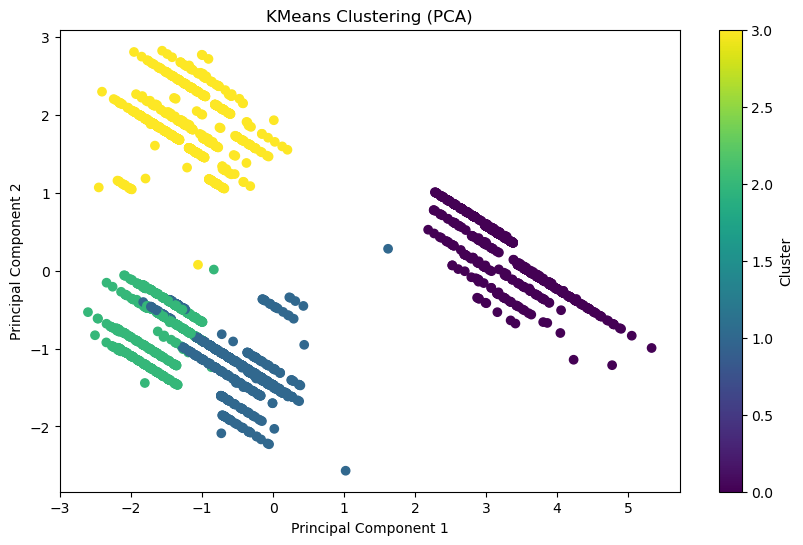

In [25]:
# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Scatter plot for KMeans Clusters after PCA
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['KMeans_Clusters'], cmap='viridis')
plt.title('KMeans Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

The scatter plot shows KMeans clustering results after applying Principal Component Analysis (PCA) for dimensionality reduction. It displays four well-separated clusters in different colors, indicating effective grouping by the KMeans algorithm. The clear separation in the reduced two-dimensional space confirms the quality of clustering and supports the choice of four clusters as optimal.

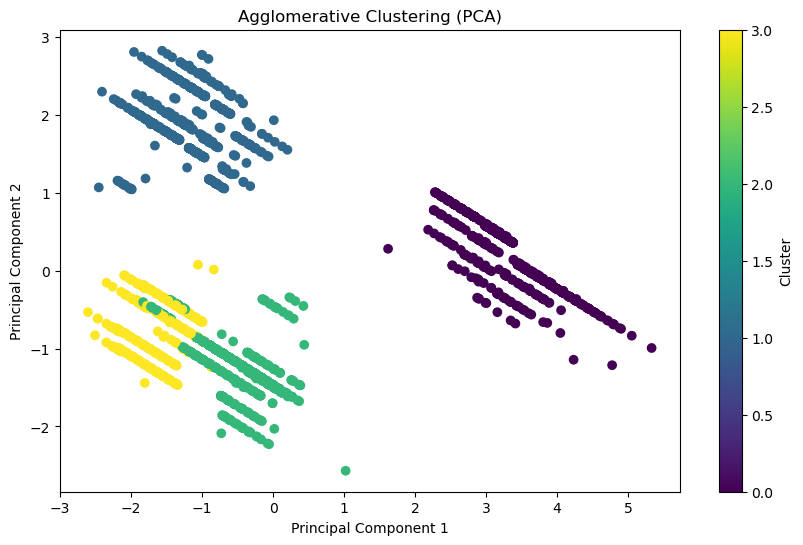

In [26]:
# Scatter plot for Agglomerative Clusters after PCA
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Agglomerative_Clusters'], cmap='viridis')
plt.title('Agglomerative Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

The scatter plot shows the results of Agglomerative Clustering after applying PCA for dimensionality reduction. It displays four well-separated clusters in different colors, indicating effective grouping by the algorithm. The clear separation in the two-dimensional space confirms the quality of clustering and supports the choice of four clusters as optimal.

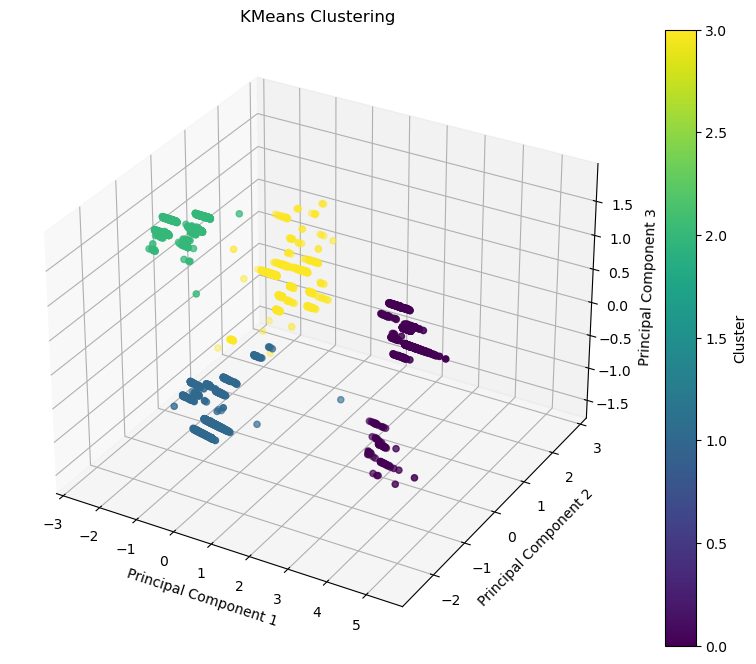

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# Create a 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for KMeans Clusters after PCA
scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=data['KMeans_Clusters'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('KMeans Clustering')

# Add a color bar
plt.colorbar(scatter, label='Cluster')

plt.show()

The 3D scatter plot shows KMeans clustering results after applying PCA for dimensionality reduction, with four well-separated clusters in different colors. The clear separation in three-dimensional space confirms effective clustering and supports the choice of four clusters as optimal.

In [28]:
# Extracting only the feature columns used for clustering (excluding the last two clustering result columns)
feature_columns = data.columns[:-2]  # This excludes 'KMeans_Clusters' and 'Agglomerative_Clusters'

# Creating the DataFrame for KMeans cluster centers
kmeans_cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_columns)

print("KMeans Cluster Centers:")
print(kmeans_cluster_centers)

# Provide customer counts for both clustering techniques
kmeans_customer_counts = data['KMeans_Clusters'].value_counts().sort_index()

print("KMeans Cluster Counts:")
print(kmeans_customer_counts)

KMeans Cluster Centers:
     Gender  Marital Status  Education  Settlement Size  Occupation    Income  \
0  0.309426        0.440574   3.000000         1.813525    1.889344  1.472173   
1  0.265712        0.827367   0.945107         0.019093    0.833731  0.016599   
2  0.897933        0.568475   0.589147         1.998708    0.976744 -0.689989   
3  0.631420        0.132931   2.276939         1.026183    1.163142 -0.930166   

        Age  
0  1.374023  
1 -0.262518  
2  0.030902  
3 -1.042276  
KMeans Cluster Counts:
0     976
1    1257
2     774
3     993
Name: KMeans_Clusters, dtype: int64


In [29]:
# Calculate cluster centers by averaging the features within each Agglomerative Cluster
agg_cluster_centers = data.groupby('Agglomerative_Clusters').mean().drop(columns=['KMeans_Clusters'])

# Calculate the counts of each cluster in Agglomerative Clustering
agg_customer_counts = data['Agglomerative_Clusters'].value_counts().sort_index()

# Print the calculated cluster centers
print("Agglomerative Clustering Cluster Centers:")
print(agg_cluster_centers.to_string())  # to_string() for better formatting in the output

# Print the counts of each cluster
print("Agglomerative Clustering Cluster Counts:")
print(agg_customer_counts.to_string())  # to_string() for better formatting in the output

Agglomerative Clustering Cluster Centers:
                          Gender  Marital Status  Education  Settlement Size  Occupation    Income       Age
Agglomerative_Clusters                                                                                      
0                       0.310133        0.440123   2.998976         1.811668    1.889458  1.471554  1.373420
1                       0.631048        0.133065   2.277218         1.026210    1.163306 -0.931092 -1.044019
2                       0.265127        0.828025   0.944268         0.019108    0.832803  0.015922 -0.263352
3                       0.898065        0.567742   0.590968         1.997419    0.976774 -0.689113  0.031749
Agglomerative Clustering Cluster Counts:
0     977
1     992
2    1256
3     775


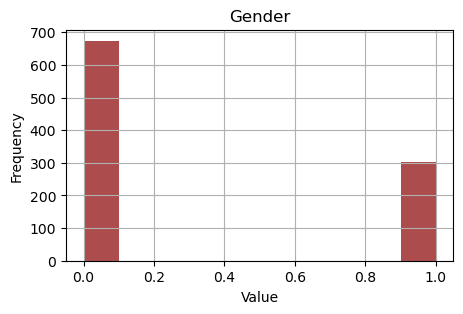

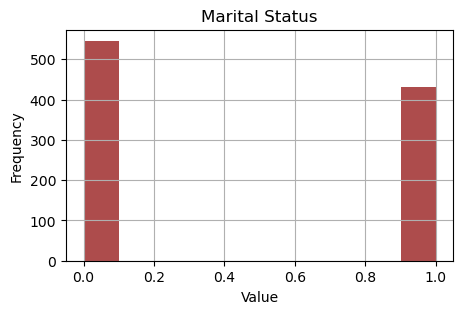

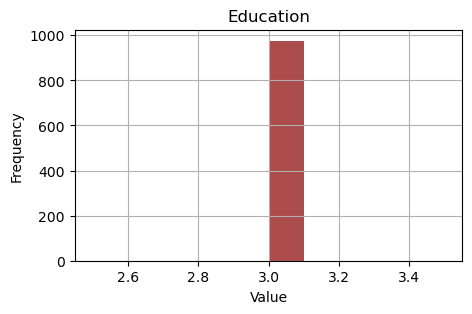

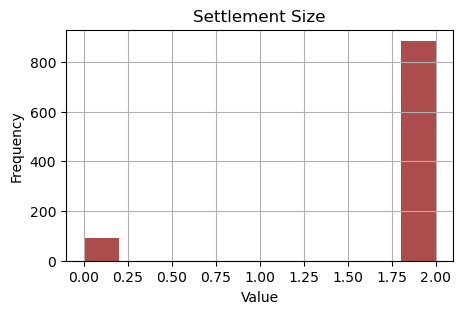

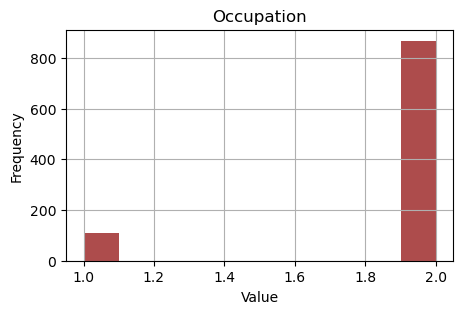

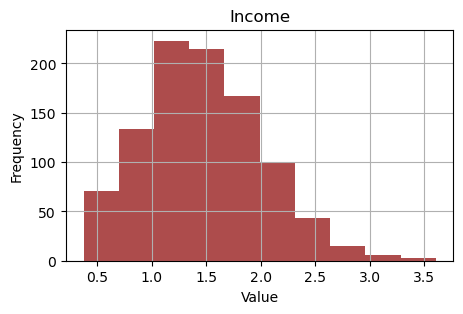

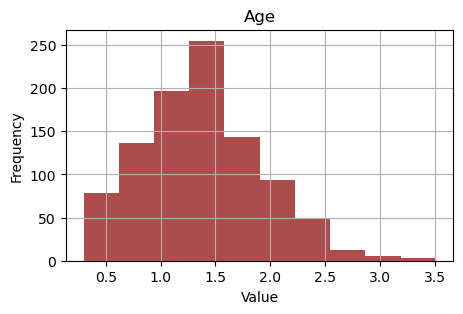

In [30]:
# Define the cluster number
cluster_number = 0

# Filter data for the specified cluster from KMeans++
kmeans_cluster_data = data[data['KMeans_Clusters'] == cluster_number]

# Remove the last two columns (cluster columns)
kmeans_cluster_data = kmeans_cluster_data.iloc[:, :-2]

# Plot histogram for each variable
for col in kmeans_cluster_data.columns:
    fig, ax = plt.subplots(figsize=(5, 3))
    kmeans_cluster_data[col].hist(ax=ax, color='darkred', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.show()

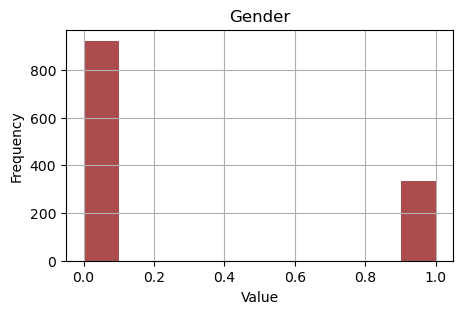

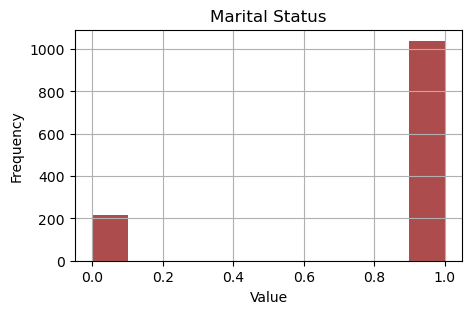

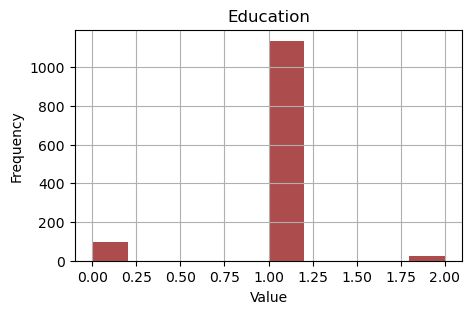

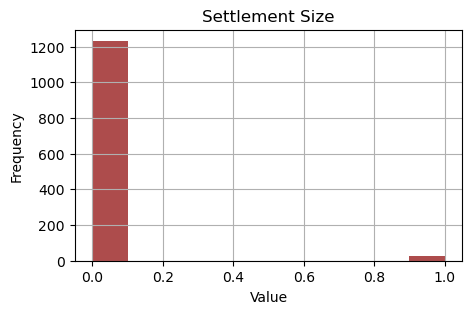

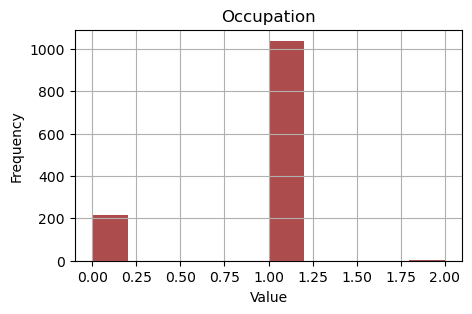

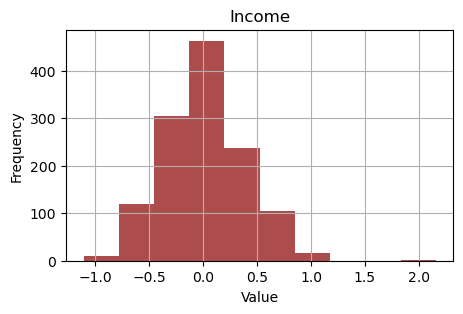

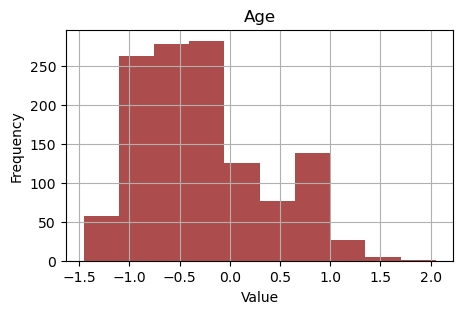

In [31]:
# Define the cluster number
cluster_number = 1

# Filter data for the specified cluster from KMeans++
kmeans_cluster_data = data[data['KMeans_Clusters'] == cluster_number]

# Remove the last two columns (cluster columns)
kmeans_cluster_data = kmeans_cluster_data.iloc[:, :-2]

# Plot histogram for each variable
for col in kmeans_cluster_data.columns:
    fig, ax = plt.subplots(figsize=(5, 3))
    kmeans_cluster_data[col].hist(ax=ax, color='darkred', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.show()

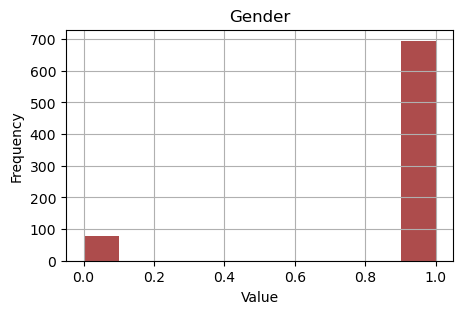

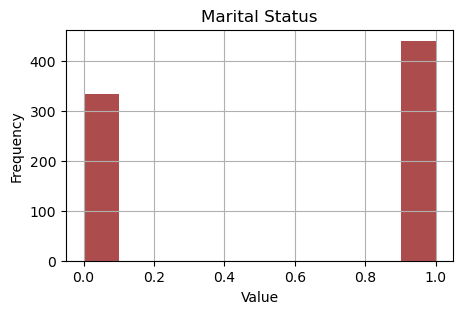

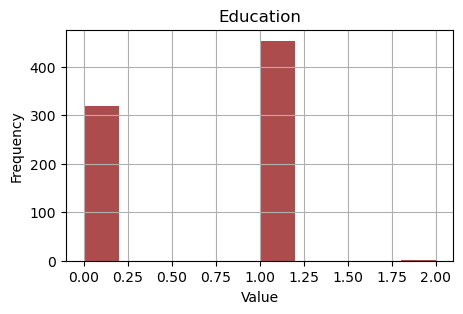

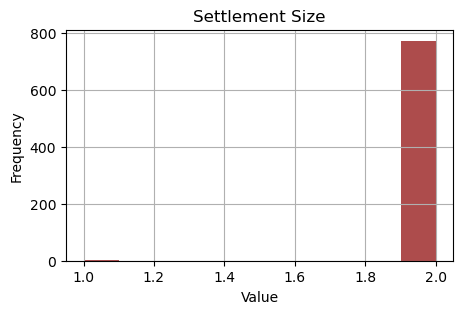

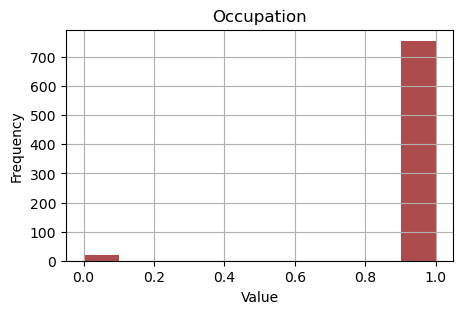

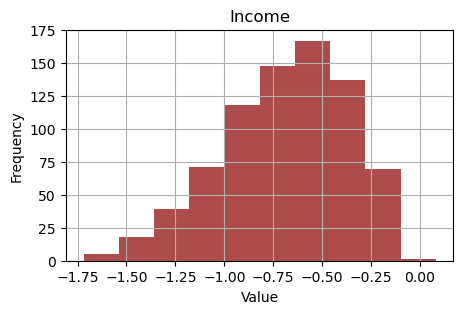

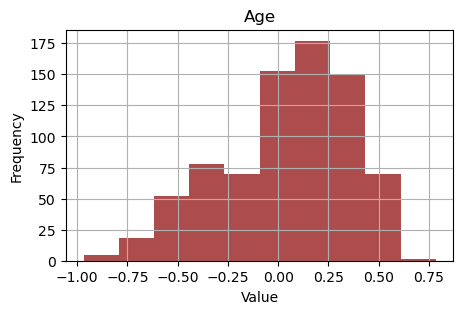

In [32]:
# Define the cluster number
cluster_number = 2

# Filter data for the specified cluster from KMeans++
kmeans_cluster_data = data[data['KMeans_Clusters'] == cluster_number]

# Remove the last two columns (cluster columns)
kmeans_cluster_data = kmeans_cluster_data.iloc[:, :-2]

# Plot histogram for each variable
for col in kmeans_cluster_data.columns:
    fig, ax = plt.subplots(figsize=(5, 3))
    kmeans_cluster_data[col].hist(ax=ax, color='darkred', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.show()

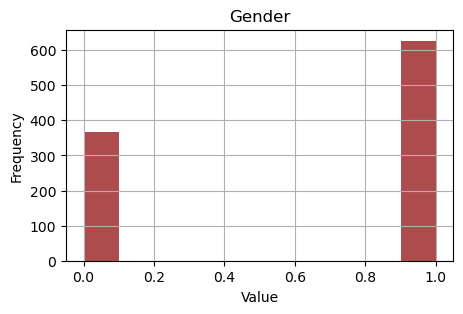

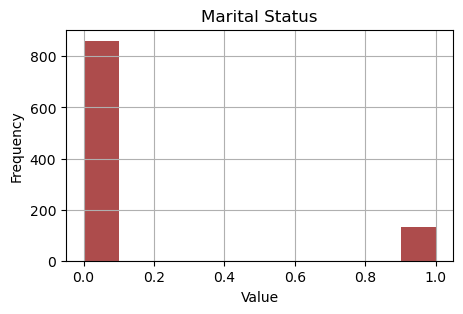

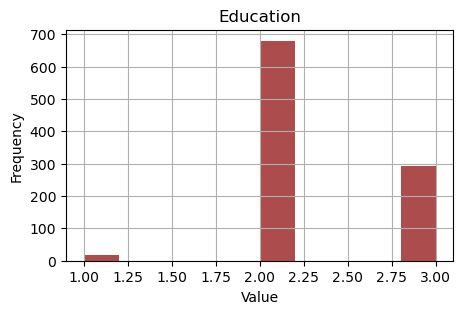

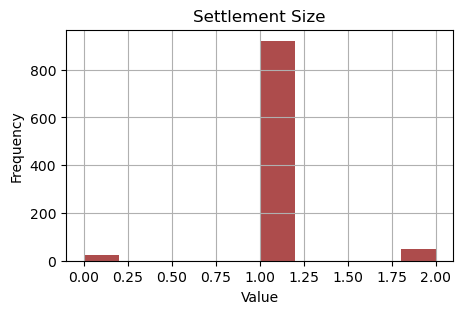

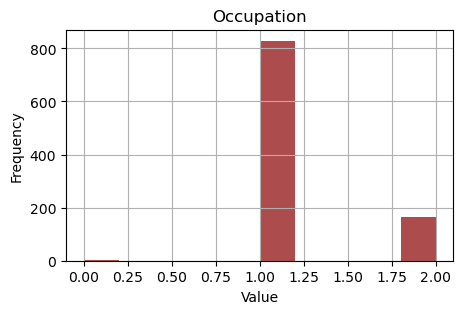

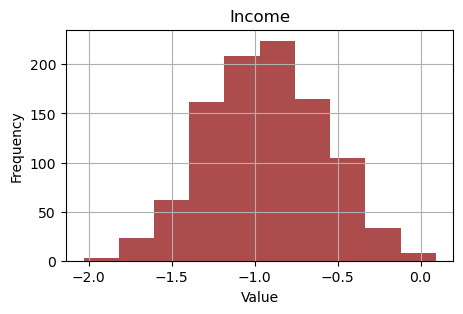

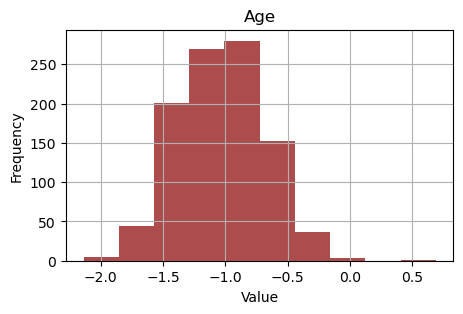

In [33]:
# Define the cluster number
cluster_number = 3

# Filter data for the specified cluster from KMeans++
kmeans_cluster_data = data[data['KMeans_Clusters'] == cluster_number]

# Remove the last two columns (cluster columns)
kmeans_cluster_data = kmeans_cluster_data.iloc[:, :-2]

# Plot histogram for each variable
for col in kmeans_cluster_data.columns:
    fig, ax = plt.subplots(figsize=(5, 3))
    kmeans_cluster_data[col].hist(ax=ax, color='darkred', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.show()

The histograms compare the four clusters from KMeans++ clustering. Cluster 0 features a younger demographic with lower income levels; Cluster 1 consists of a mix of middle-aged individuals with moderate incomes; Cluster 2 is characterized by an older demographic, boasting higher education and income; and Cluster 3 comprises younger, possibly more transient individuals with lower education and income levels.

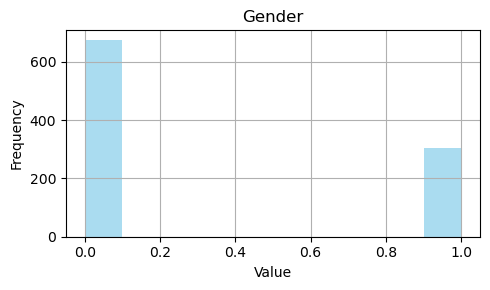

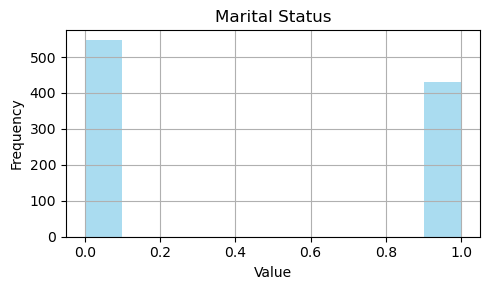

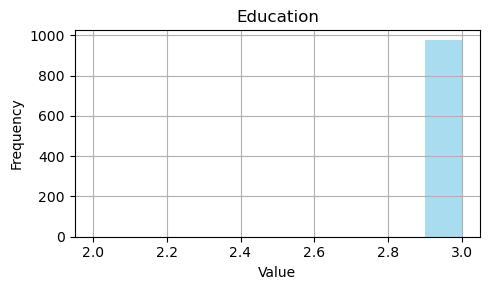

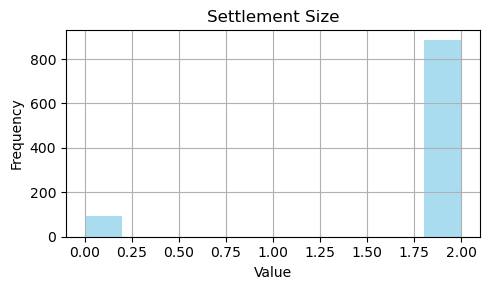

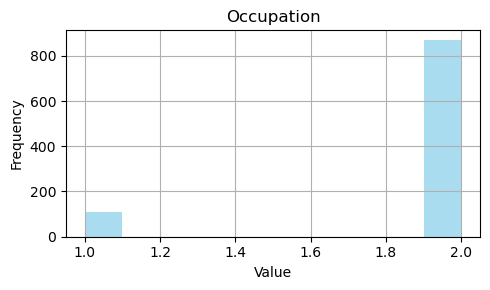

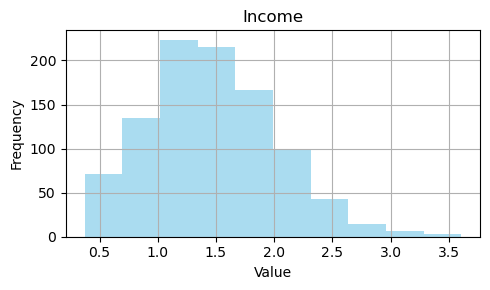

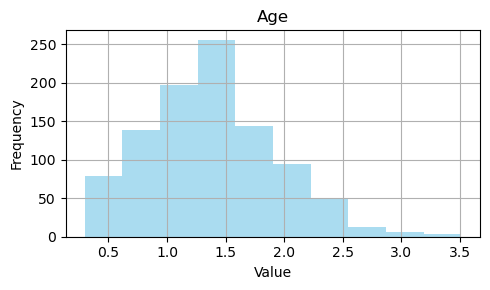

In [34]:
# Define the cluster number
cluster_number = 0

# Filter data for the specified cluster from Agglomerative clustering
agg_cluster_data = data[data['Agglomerative_Clusters'] == cluster_number]

# Remove the last two columns (cluster columns)
agg_cluster_data = agg_cluster_data.iloc[:, :-2]

# Plot histogram for each variable
for col in agg_cluster_data.columns:
    # Create a new figure for each variable
    fig, ax = plt.subplots(figsize=(5, 3))
    # Plot histogram of the column
    agg_cluster_data[col].hist(ax=ax, color='skyblue', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

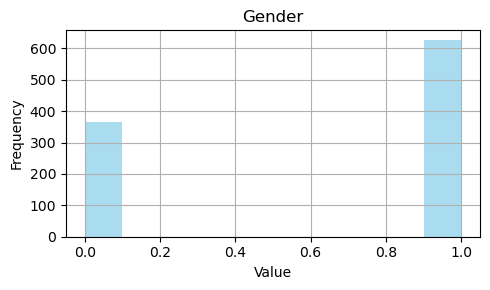

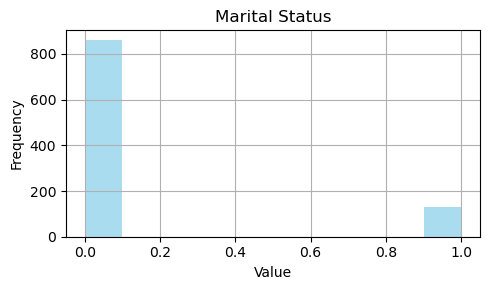

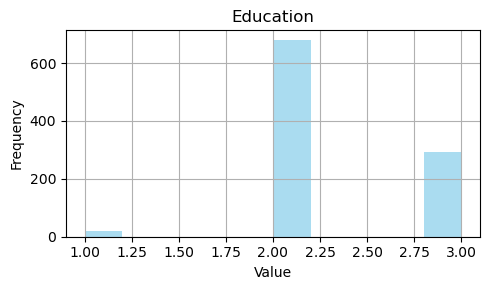

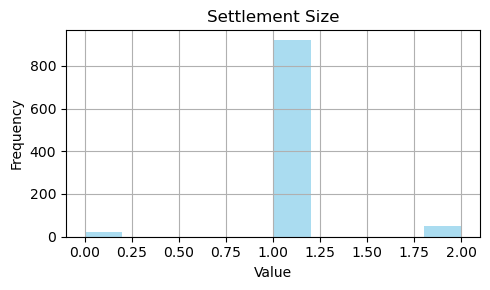

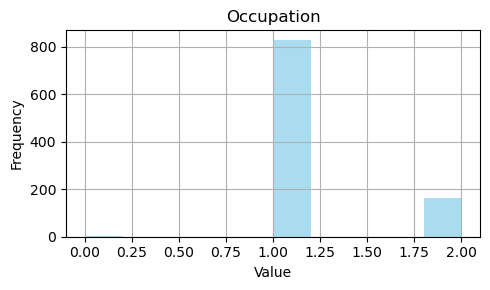

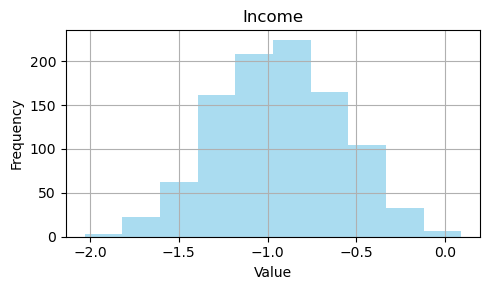

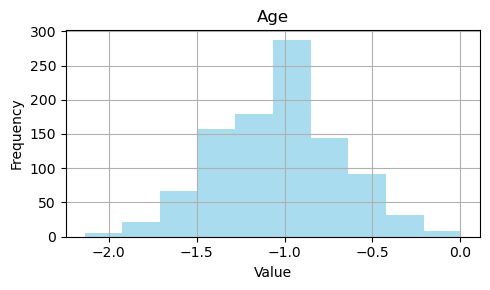

In [35]:
# Define the cluster number
cluster_number = 1

# Filter data for the specified cluster from Agglomerative clustering
agg_cluster_data = data[data['Agglomerative_Clusters'] == cluster_number]

# Remove the last two columns (cluster columns)
agg_cluster_data = agg_cluster_data.iloc[:, :-2]

# Plot histogram for each variable
for col in agg_cluster_data.columns:
    # Create a new figure for each variable
    fig, ax = plt.subplots(figsize=(5, 3))
    # Plot histogram of the column
    agg_cluster_data[col].hist(ax=ax, color='skyblue', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

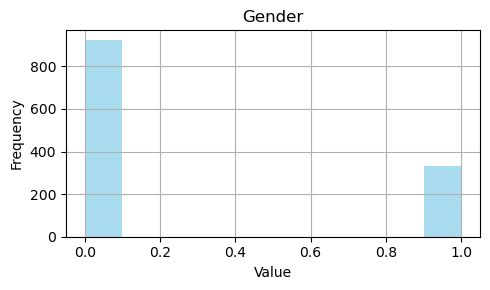

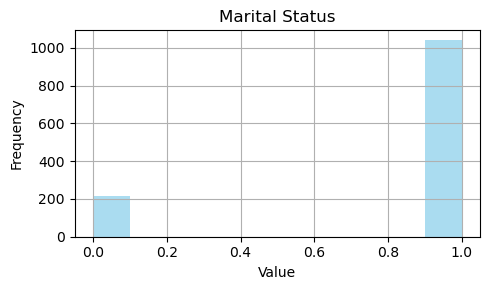

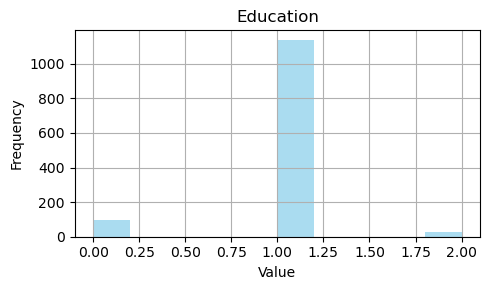

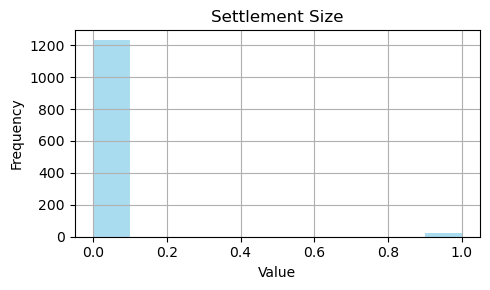

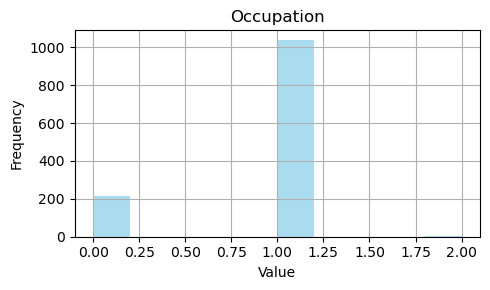

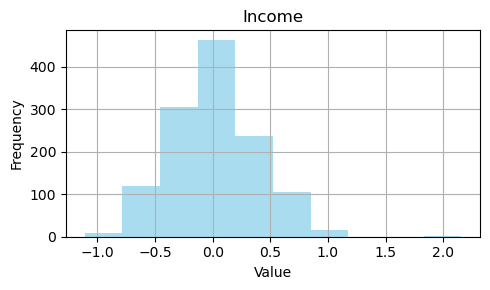

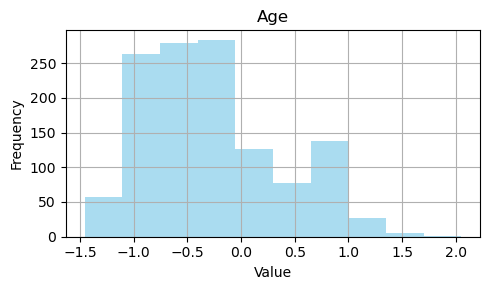

In [36]:
# Define the cluster number
cluster_number = 2

# Filter data for the specified cluster from Agglomerative clustering
agg_cluster_data = data[data['Agglomerative_Clusters'] == cluster_number]

# Remove the last two columns (cluster columns)
agg_cluster_data = agg_cluster_data.iloc[:, :-2]

# Plot histogram for each variable
for col in agg_cluster_data.columns:
    # Create a new figure for each variable
    fig, ax = plt.subplots(figsize=(5, 3))
    # Plot histogram of the column
    agg_cluster_data[col].hist(ax=ax, color='skyblue', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

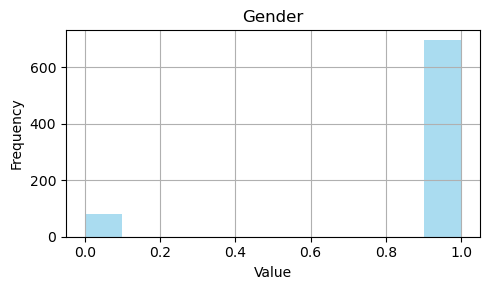

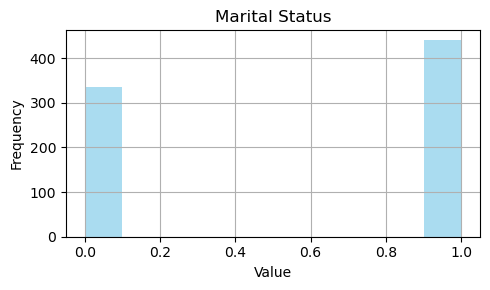

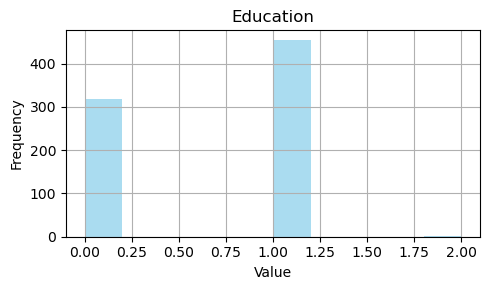

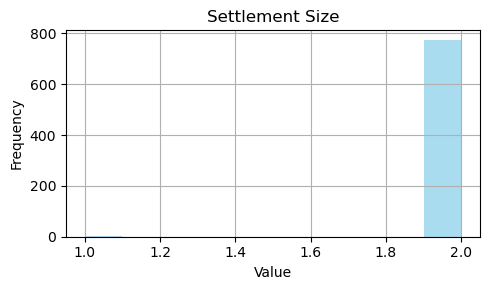

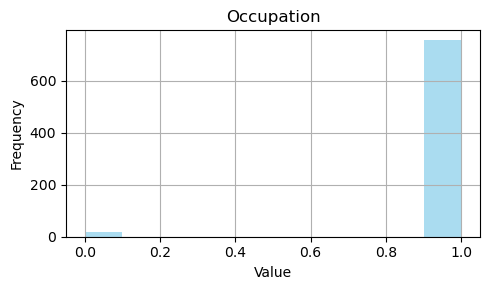

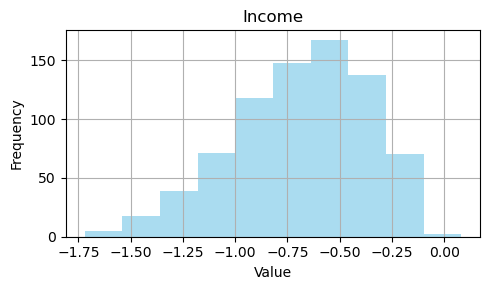

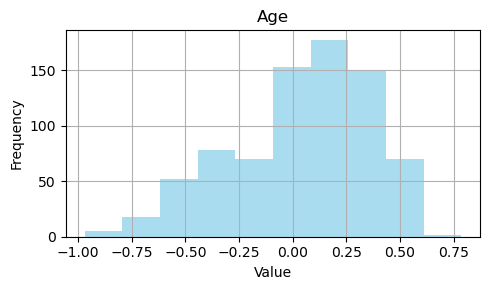

In [37]:
# Define the cluster number
cluster_number = 3

# Filter data for the specified cluster from Agglomerative clustering
agg_cluster_data = data[data['Agglomerative_Clusters'] == cluster_number]

# Remove the last two columns (cluster columns)
agg_cluster_data = agg_cluster_data.iloc[:, :-2]

# Plot histogram for each variable
for col in agg_cluster_data.columns:
    # Create a new figure for each variable
    fig, ax = plt.subplots(figsize=(5, 3))
    # Plot histogram of the column
    agg_cluster_data[col].hist(ax=ax, color='skyblue', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

The histograms compare four clusters derived from Agglomerative Clustering. Cluster 0 is younger with lower income levels; Cluster 1 shows a mix of middle-aged individuals with moderate income; Cluster 2 includes an older demographic with higher education and income; Cluster 3 consists of younger, possibly transient individuals with lower education and income levels.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the centroids for KMeans++
print("KMeans++ centroids shape:", kmeans_cluster_centers.shape)

# Calculate the centroids for Agglomerative clustering
print("Agglomerative centroids shape:", agg_cluster_centers.shape)

KMeans++ centroids shape: (4, 7)
Agglomerative centroids shape: (4, 7)


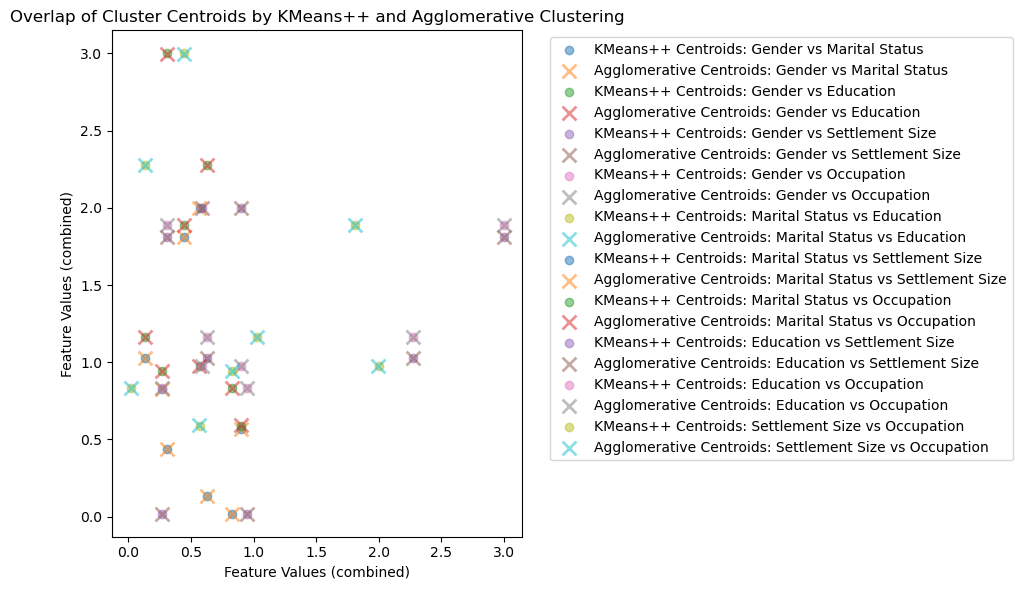

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the centroids for KMeans++
kmeans_centroids = kmeans_cluster_centers.values[:, :-2]

# Calculate the centroids for Agglomerative clustering
agg_centroids = agg_cluster_centers.values[:, :-2]

# Define the features
features = ['Gender', 'Marital Status', 'Education', 'Settlement Size', 'Occupation']

# Create a figure for the combined plot
plt.figure(figsize=(10, 6))

# Plot all centroids for each feature pair combination in the same plot
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.scatter(kmeans_centroids[:, i], kmeans_centroids[:, j], label=f'KMeans++ Centroids: {features[i]} vs {features[j]}', marker='o', alpha=0.5)
        plt.scatter(agg_centroids[:, i], agg_centroids[:, j], label=f'Agglomerative Centroids: {features[i]} vs {features[j]}', marker='x', alpha=0.5, s=100, linewidths=2)

# Configure the plot with labels and title
plt.xlabel('Feature Values (combined)')
plt.ylabel('Feature Values (combined)')
plt.title('Overlap of Cluster Centroids by KMeans++ and Agglomerative Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()
plt.show()

The plot displays the comparison of cluster centroids between KMeans++ and Agglomerative Clustering methods across multiple feature pair combinations. Each pair of features is represented by points, where 'o' markers denote centroids calculated by KMeans++ and 'x' markers represent centroids from Agglomerative Clustering.

In [40]:
# Create a cross-tabulation of KMeans and Agglomerative Clustering labels
cross_tab = pd.crosstab(data['KMeans_Clusters'], data['Agglomerative_Clusters'])

# Print the cross-tabulation
print(cross_tab)

Agglomerative_Clusters    0    1     2    3
KMeans_Clusters                            
0                       976    0     0    0
1                         1    0  1256    0
2                         0    0     0  774
3                         0  992     0    1


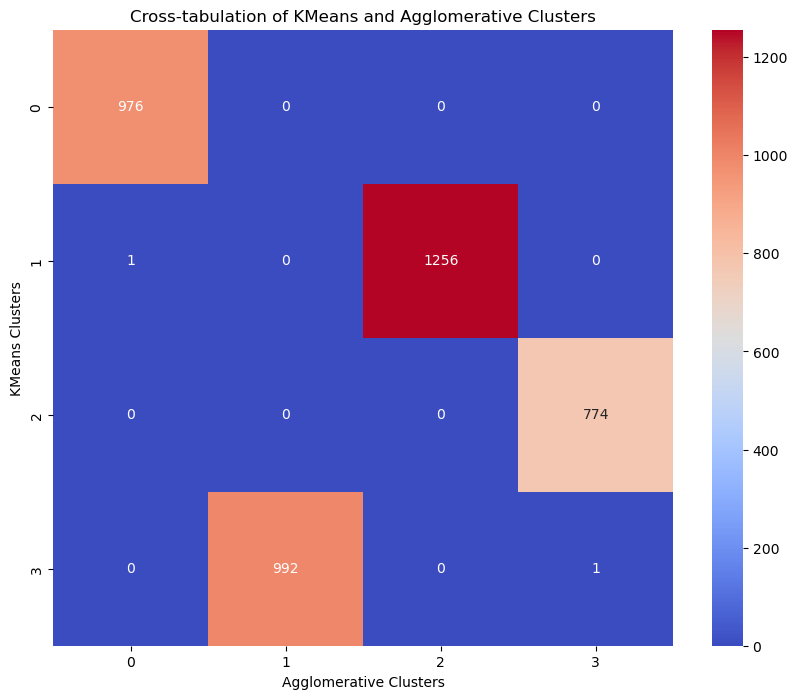

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of KMeans and Agglomerative Clustering labels
cross_tab = pd.crosstab(data['KMeans_Clusters'], data['Agglomerative_Clusters'])

# Create a heatmap from the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')  # 'fmt' is used to format the numeric values as integers
plt.title('Cross-tabulation of KMeans and Agglomerative Clusters')
plt.xlabel('Agglomerative Clusters')
plt.ylabel('KMeans Clusters')
plt.show()

The cross-tabulation table provided shows the overlap between the clusters identified by KMeans and Agglomerative Clustering.